In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### 1.Problem_Statement

In [ ]:
To predict wine cultivator based on ingredients present in wine using following parameters:
Alcohol 
Malic.acid   
Ash
Acl
Mg
Phenols
Flavanoids
Nonflavanoid.phenols
Proanth
Color.int
Hue
OD
Proline

#### 2.Data_Reading

In [2]:
df = pd.read_csv("wine.csv")
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### 3.Exploratory_Data_Analysis

In [4]:
df.shape

(178, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wine,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic.acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Acl,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Mg,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid.phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanth,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [9]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [11]:
df["Wine"].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

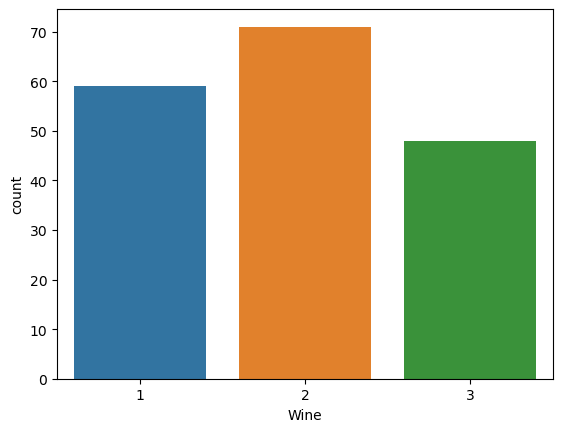

In [12]:
sns.countplot(x =df["Wine"])
plt.savefig("target")

#### 4.Feature_Engineering

#### 5.Feature_selection

#### 5.1Correlation

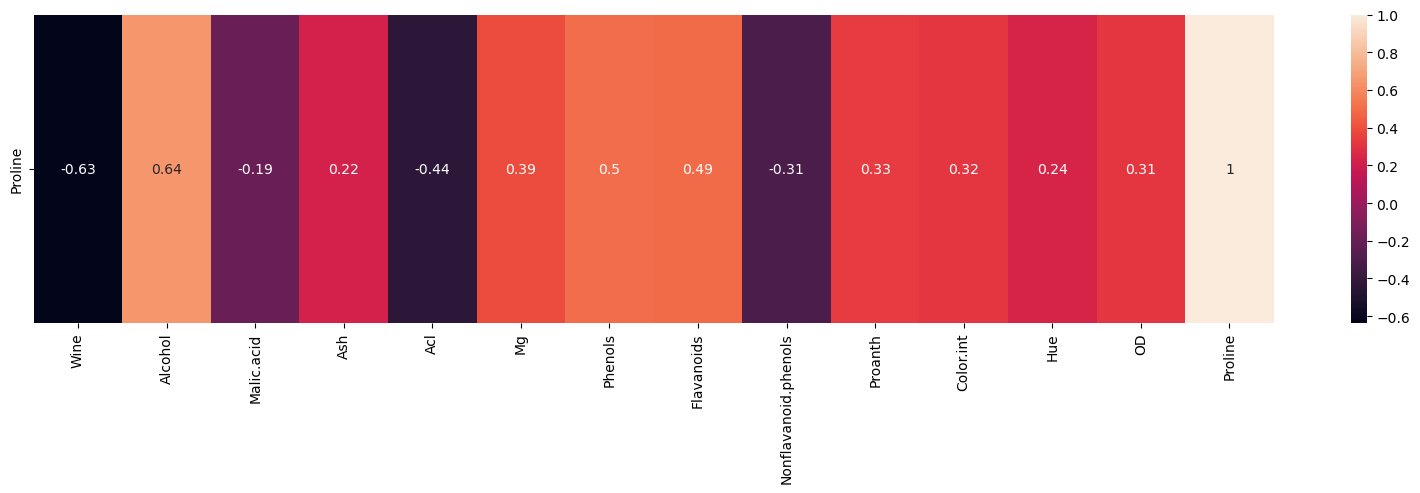

In [13]:
plt.figure(figsize=(20,4))
sns.heatmap(df.corr().tail(1),annot=True)
plt.savefig("correlation")

#### 5.2.Multicolinearity

In [14]:
x = df.drop("Wine",axis = 1)
y = df["Wine"]

In [16]:
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)
vif_values = pd.Series(vif_list,index = x.columns)
vif_values

Alcohol                 206.189057
Malic.acid                8.925541
Ash                     165.640370
Acl                      73.141564
Mg                       67.364868
Phenols                  62.786935
Flavanoids               35.535602
Nonflavanoid.phenols     16.636708
Proanth                  17.115665
Color.int                17.022272
Hue                      45.398407
OD                       54.539165
Proline                  16.370828
dtype: float64

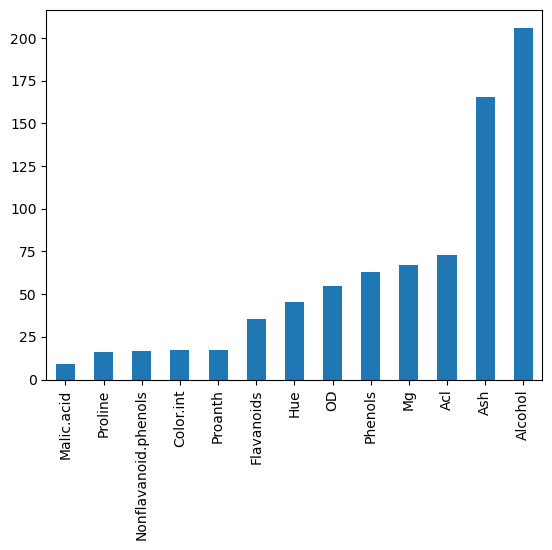

In [37]:
vif_values.sort_values().plot(kind = "bar")
plt.savefig("vif")

#### 6.Model_Training

#### 6.1.Assign features and target to variables

In [20]:
x = df.drop("Wine",axis = 1)
y = df["Wine"]

In [21]:
x

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Wine, Length: 178, dtype: int64

#### 6.2.Data_Splitting

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20,stratify=y)

#### 6.3.Creating_Instance

In [24]:
adb_clf = AdaBoostClassifier()
adb_clf

AdaBoostClassifier()

#### 6.4.Model_Fitting

In [25]:
adb_clf.fit(x_train,y_train)

AdaBoostClassifier()

In [30]:
adb_clf.score(x_train,y_train)

0.971830985915493

In [31]:
adb_clf.score(x_test,y_test)

0.9444444444444444

#### 7.Model_Evaluation

#### 7.1.Test_Data

In [32]:
y_pred_test = adb_clf.predict(x_test)

accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy :",accuracy)
print("**********************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("Confusion_Matrix :\n",cnf_matrix)
print("**********************************")

clf_report = classification_report(y_pred_test,y_test)
print("Classification_Report :",clf_report)

Accuracy : 0.9444444444444444
**********************************
Confusion_Matrix :
 [[12  2  0]
 [ 0 12  0]
 [ 0  0 10]]
**********************************
Classification_Report :               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



#### 7.2.Train_Data

In [33]:
y_pred_train = adb_clf.predict(x_train)

accuracy = accuracy_score(y_pred_train,y_train)
print("Accuracy :",accuracy)
print("**********************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("Confusion_Matrix :\n",cnf_matrix)
print("**********************************")

clf_report = classification_report(y_pred_train,y_train)
print("Classification_Report :",clf_report)

Accuracy : 0.971830985915493
**********************************
Confusion_Matrix :
 [[45  1  0]
 [ 2 55  0]
 [ 0  1 38]]
**********************************
Classification_Report :               precision    recall  f1-score   support

           1       0.96      0.98      0.97        46
           2       0.96      0.96      0.96        57
           3       1.00      0.97      0.99        39

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



In [34]:
adb_clf.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.24,
       0.24, 0.02])

In [35]:
df_fr_imp = pd.DataFrame(adb_clf.feature_importances_,index=x.columns)
df_fr_imp

,0
Alcohol,0.00
Malic.acid,0.00
Ash,0.00
Acl,0.00
Mg,0.00
Phenols,0.00
Flavanoids,0.50
Nonflavanoid.phenols,0.00
Proanth,0.00
Color.int,0.00


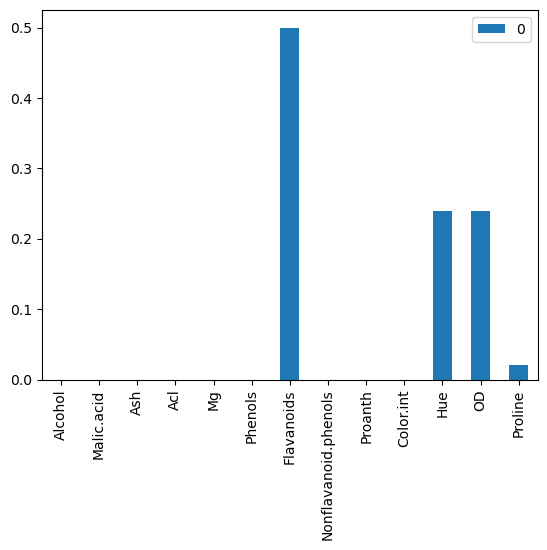

In [38]:
df_fr_imp.plot(kind = "bar")
plt.savefig("feature_importance")

#### Hyperparameter_Tunning

#### 1.GridSearchCV

In [70]:
adb_clf = AdaBoostClassifier(random_state=20)
hyp_grid = {"n_estimators":np.arange(10,90),
           "learning_rate":np.arange(0.1,2,0.2)}
gscv_adb_clf = GridSearchCV(adb_clf,hyp_grid,cv = 5,n_jobs= -1)
gscv_adb_clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=20), n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])})

In [71]:
adb_clf = gscv_adb_clf.best_estimator_
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=26,
                   random_state=20)

#### Test_Data

In [72]:
y_pred_test = adb_clf.predict(x_test)

accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy :",accuracy)
print("**********************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("Confusion_Matrix :\n",cnf_matrix)
print("**********************************")

clf_report = classification_report(y_pred_test,y_test)
print("Classification_Report :",clf_report)

Accuracy : 0.9444444444444444
**********************************
Confusion_Matrix :
 [[12  2  0]
 [ 0 12  0]
 [ 0  0 10]]
**********************************
Classification_Report :               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



#### Train_Data

In [73]:
y_pred_train = adb_clf.predict(x_train)

accuracy = accuracy_score(y_pred_train,y_train)
print("Accuracy :",accuracy)
print("**********************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("Confusion_Matrix :\n",cnf_matrix)
print("**********************************")

clf_report = classification_report(y_pred_train,y_train)
print("Classification_Report :",clf_report)

Accuracy : 1.0
**********************************
Confusion_Matrix :
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
**********************************
Classification_Report :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [74]:
df_fr_imp_1= pd.DataFrame(adb_clf.feature_importances_,index=x.columns)
df_fr_imp_1

,0
Alcohol,0.115385
Malic.acid,0.000000
Ash,0.000000
Acl,0.000000
Mg,0.000000
Phenols,0.000000
Flavanoids,0.269231
Nonflavanoid.phenols,0.000000
Proanth,0.000000
Color.int,0.192308


#### 2.RandomizedSearchCV

In [49]:
adb_clf = AdaBoostClassifier(random_state=20)
hyp_grid = {"n_estimators":np.arange(30,50),
           "learning_rate":np.arange(0.1,2,0.2)}
rscv_adb_clf = RandomizedSearchCV(adb_clf,hyp_grid,cv = 5,n_jobs= -1)
rscv_adb_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=20),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                                        'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])})

In [50]:
adb_clf = rscv_adb_clf.best_estimator_
adb_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=30,
                   random_state=20)

#### Test_Data

In [51]:
y_pred_test = adb_clf.predict(x_test)

accuracy = accuracy_score(y_pred_test,y_test)
print("Accuracy :",accuracy)
print("**********************************")

cnf_matrix = confusion_matrix(y_pred_test,y_test)
print("Confusion_Matrix :\n",cnf_matrix)
print("**********************************")

clf_report = classification_report(y_pred_test,y_test)
print("Classification_Report :",clf_report)

Accuracy : 0.9444444444444444
**********************************
Confusion_Matrix :
 [[12  2  0]
 [ 0 12  0]
 [ 0  0 10]]
**********************************
Classification_Report :               precision    recall  f1-score   support

           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



#### Train_Data

In [52]:
y_pred_train = adb_clf.predict(x_train)

accuracy = accuracy_score(y_pred_train,y_train)
print("Accuracy :",accuracy)
print("**********************************")

cnf_matrix = confusion_matrix(y_pred_train,y_train)
print("Confusion_Matrix :\n",cnf_matrix)
print("**********************************")

clf_report = classification_report(y_pred_train,y_train)
print("Classification_Report :",clf_report)

Accuracy : 1.0
**********************************
Confusion_Matrix :
 [[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]
**********************************
Classification_Report :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [53]:
df_fr_imp_2= pd.DataFrame(adb_clf.feature_importances_,index=x.columns)
df_fr_imp_2

,0
Alcohol,0.100000
Malic.acid,0.000000
Ash,0.000000
Acl,0.000000
Mg,0.000000
Phenols,0.000000
Flavanoids,0.300000
Nonflavanoid.phenols,0.000000
Proanth,0.000000
Color.int,0.200000


#### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [75]:
dict1 = {"Test_Accuracy":[0.94,0.94,0.94],
        "Train_Accuracy":[0.97,1.00,1.00],
        }
acu_df = pd.DataFrame(dict1,index = ["General","GS_HYP","RS_HYP"])
acu_df

,Test_Accuracy,Train_Accuracy
General,0.94,0.97
GS_HYP,0.94,1.00
RS_HYP,0.94,1.00


In [76]:
y_test[10:15]

135    3
85     2
170    3
154    3
130    3
Name: Wine, dtype: int64

In [77]:
y_pred_test[10:15]

array([3, 2, 3, 3, 3], dtype=int64)

In [78]:
y_train[10:15]

17     1
36     1
139    3
66     2
142    3
Name: Wine, dtype: int64

In [79]:
y_pred_train[10:15]

array([1, 1, 3, 2, 3], dtype=int64)